In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.8.2


In [4]:
keras.__version__

'2.8.0'

In [5]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [6]:
print(X_train_full.shape)

print(X_train_full.dtype)

print(y_train_full)

(60000, 28, 28)
uint8
[5 0 4 ... 5 6 8]


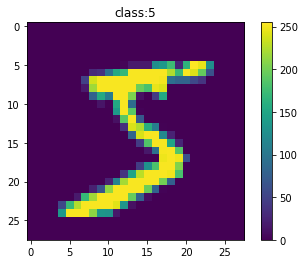

In [7]:
plt.figure()

plt.imshow(X_train_full[0])

plt.colorbar()

plt.grid(False)

plt.title('class:{}'.format(y_train_full[0]))

plt.show()

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [9]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

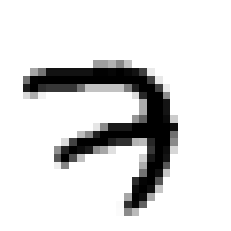

In [10]:
plt.imshow(X_train[0], cmap="binary") #cmap- color map

plt.axis('off')

plt.show()

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu"))

model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax")
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,

validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6138 - accuracy: 0.8399 - val_loss: 0.3022 - val_accuracy: 0.9192
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2869 - accuracy: 0.9185 - val_loss: 0.2402 - val_accuracy: 0.9334
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2349 - accuracy: 0.9333 - val_loss: 0.2067 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2009 - accuracy: 0.9431 - val_loss: 0.1776 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1755 - accuracy: 0.9507 - val_loss: 0.1597 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1554 - accuracy: 0.9556 - val_loss: 0.1433 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1393 - accuracy: 0.9611 - val_loss: 0.1290 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]

y_proba = model.predict(X_new)

y_proba.round(2)



In [ ]:
y_pred = model.predict(X_new)
#np.argmax(preds)
y_pred